In [1]:
import BioSimSpace as bss
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)



Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages

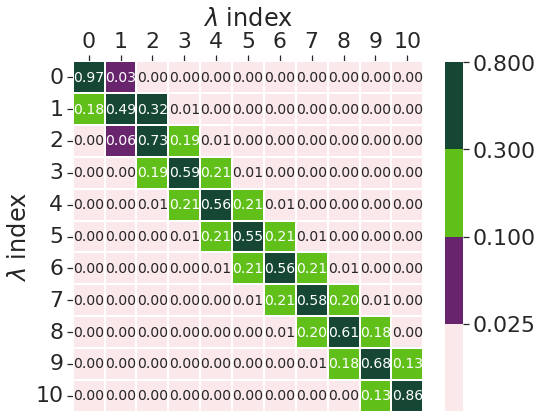

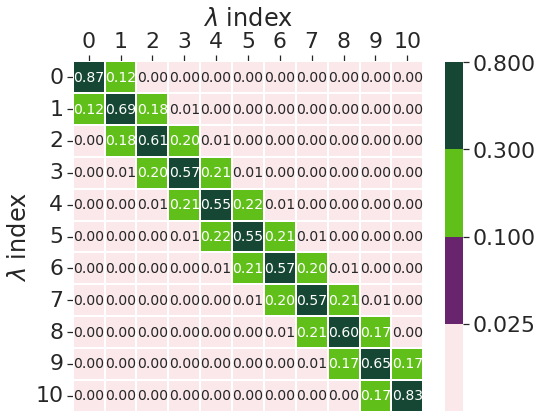

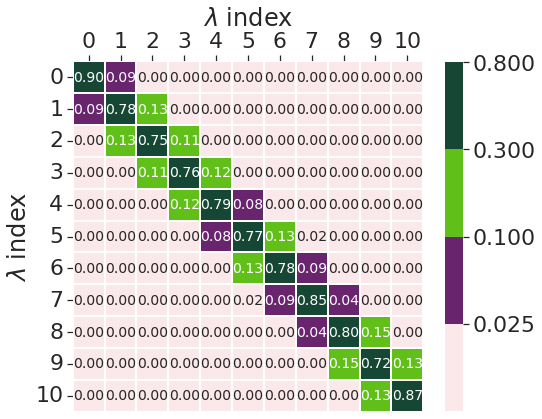

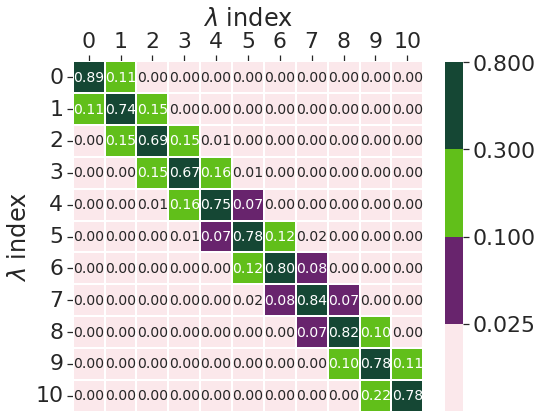

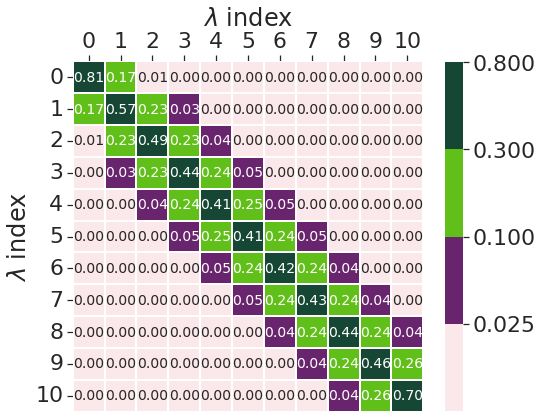

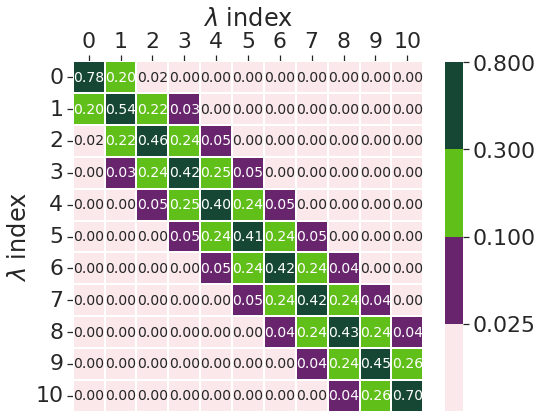

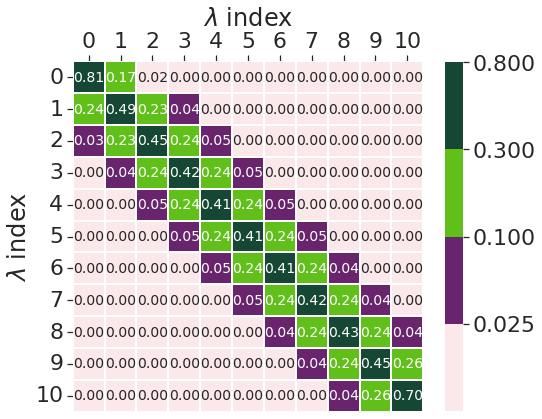

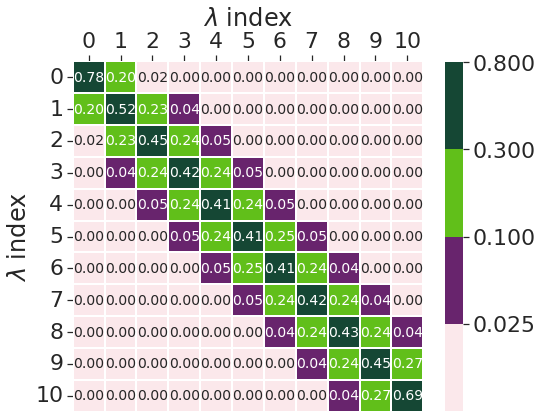

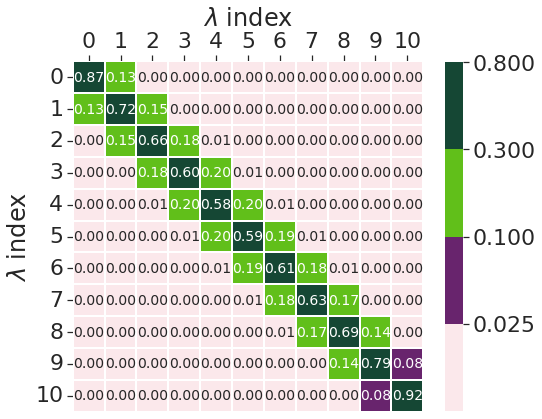

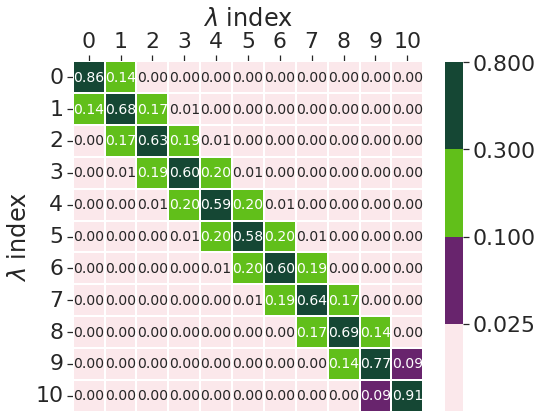

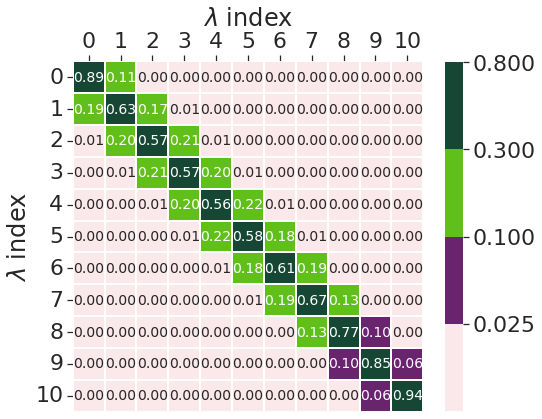

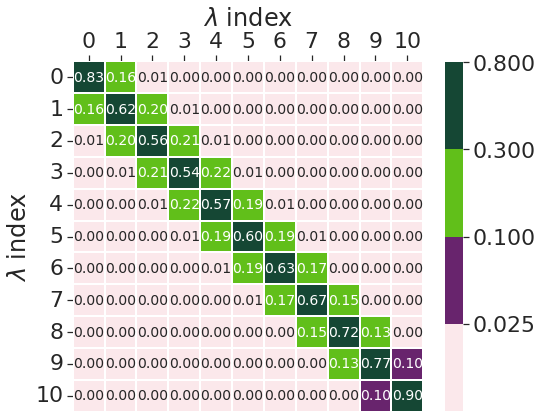

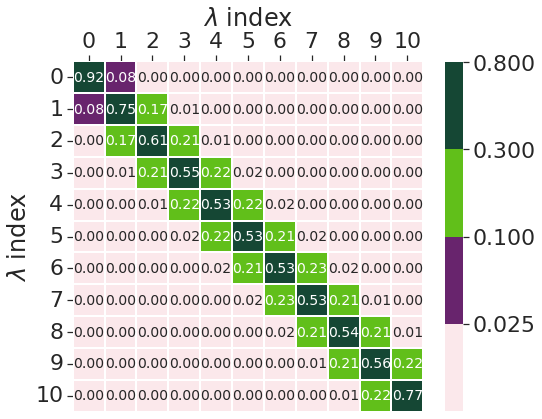

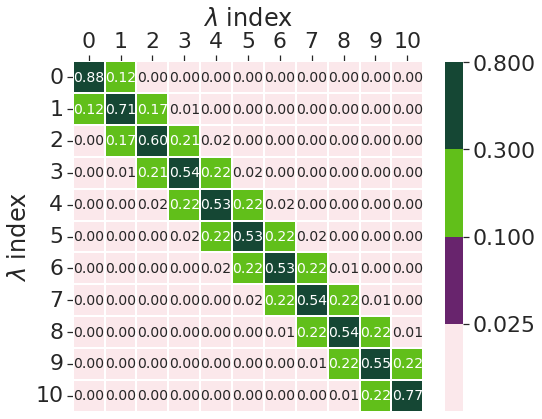

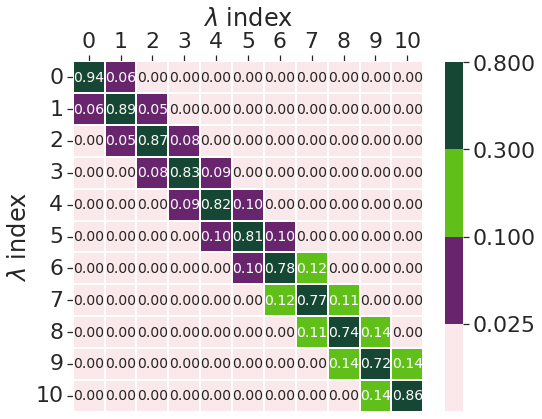

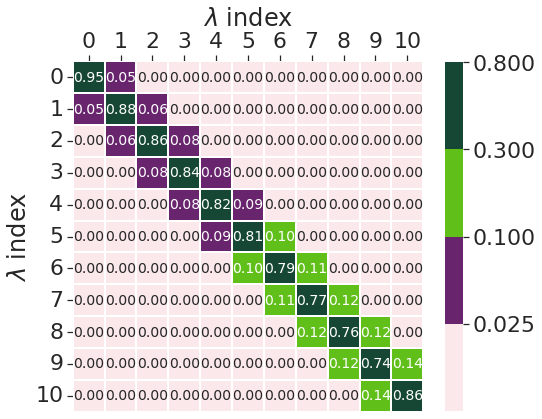

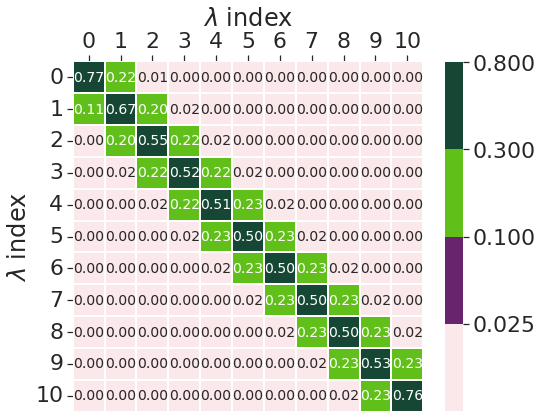

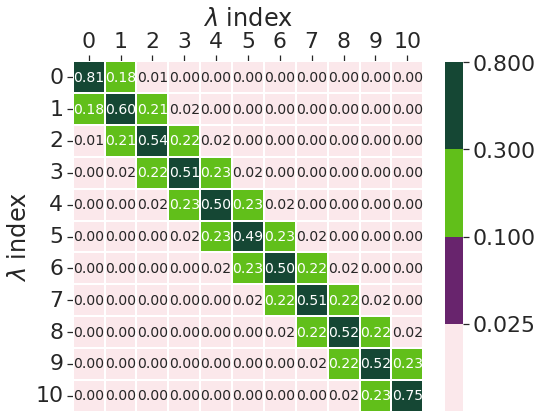

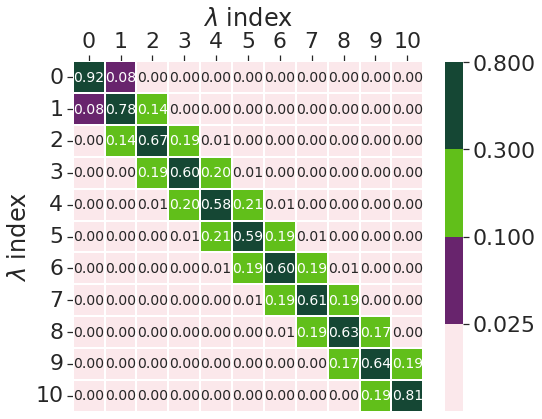

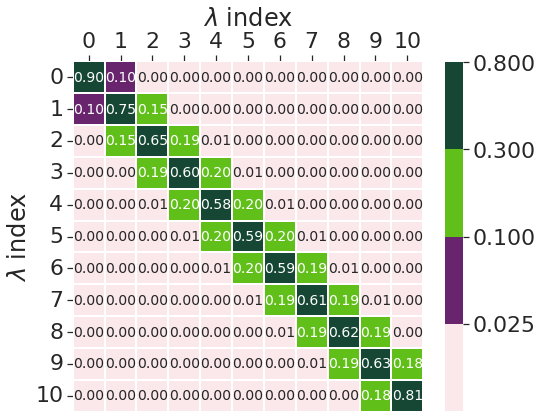

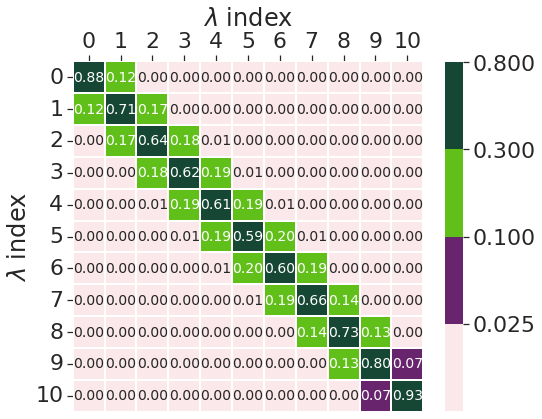

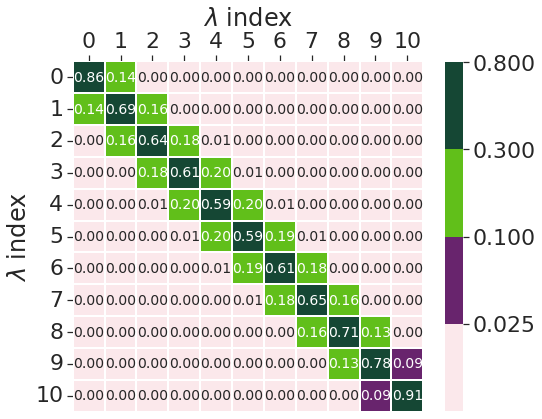

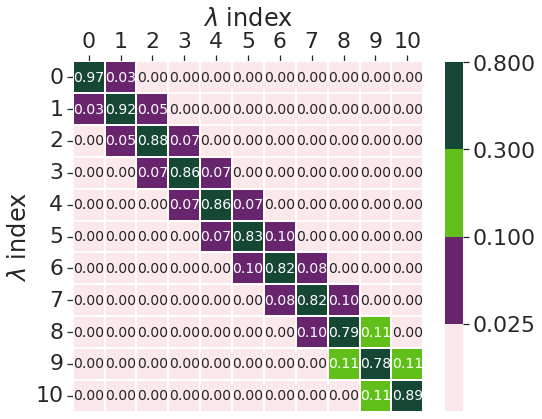

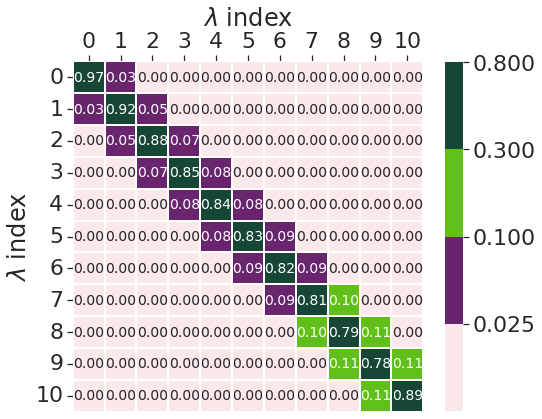

In [2]:

ligands_all = np.arange(2, 17, 1)
ligands = np.delete(ligands_all, [10, 12, 13])
stages = ["bound", "free"]
for ligand in ligands:
    for stage in stages:
        mbar_file = f"../outputs/SOMD/lig_h_1~lig_h_{ligand}/{stage}/mbar.txt"
        start_index = 1
        end_index = -1
        matrix_lines = []
        with open(mbar_file) as file:
            lines = file.readlines()
            for i in range(len(lines)):
                if "#Overlap matrix" in lines[i]:
                    start_index = i + 1
                elif "#DG from neighbouring lambda in kcal/mol" in lines[i]:
                    end_index = i
            matrix_lines = lines[start_index:end_index]
        
        matrix = []
        for line in matrix_lines:
            split_line = line.replace("\n", "").split(" ")
            new_line = [float(x) for x in split_line]
            matrix.append(new_line)
        
        colour_map = matplotlib.colors.ListedColormap(['#FBE8EB','#68246D','#61BF1A', '#154734'])
        n_colours = colour_map.N
        boundary_values = [0.0, 0.025, 0.1, 0.3, 0.8]
        norm_colours = matplotlib.colors.BoundaryNorm(boundary_values, n_colours, clip=False)
        colour_bar_args = dict(ticks=[0.025, 0.1, 0.3, 0.8],
                            shrink=0.685)

        fig = plt.figure(figsize=(8, 8))
        sns.set_style("ticks")
        sns.set_context("notebook", font_scale=2)
        ax = sns.heatmap(matrix, 
                        annot=True, 
                        fmt=".2f", 
                        linewidths=0.3, 
                        annot_kws={"size": 14}, 
                        square=True, 
                        robust=True, 
                        cmap=colour_map,
                        norm=norm_colours, 
                        cbar_kws=colour_bar_args,
                        vmax=1
                        )
        ax.xaxis.tick_top()
        ax.tick_params(axis="y", rotation=360)
        ax.set_title(r"$\lambda$ index", fontsize=24)
        ax.set_ylabel(r"$\lambda$ index", fontsize=24)
        # ax.set_xlabel(f"{stage} ligand {ligand}", fontsize=24)
        fig.tight_layout()
        plt.savefig(f"../../plots/overlap_matrices/{stage}/om_{ligand}_tr.pdf", transparent=True)